In [71]:
#import libraries
import os as os
os.environ['USE_PYGEOS'] = '0'
import matplotlib.pyplot as plt
import osmnx as ox
import geopandas as gpd
import networkx as nx
import shapely as shply
import folium as fm
import rasterio as rio
import elevation as elev

In [55]:
#reading evacuation zone shape file
ev_zones = gpd.read_file('/Users/maxspiegel/Desktop/490GSDS/final_project/EvacuationBrochure_Data/EvacuationZones.shp')

#reading critical facilities shape file
critical_facil = gpd.read_file('/Users/maxspiegel/Desktop/490GSDS/final_project/EvacuationBrochure_Data/CriticalFacilities.shp')

#reading outsize hazards shapefile
outside_hazards = gpd.read_file('/Users/maxspiegel/Desktop/490GSDS/final_project/EvacuationBrochure_Data/OutsideHazardArea_GreenHighGround.shp')

<AxesSubplot: >

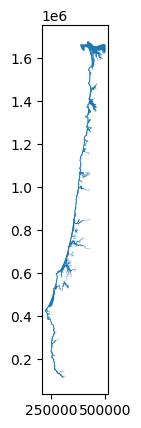

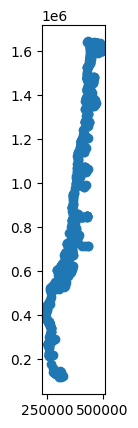

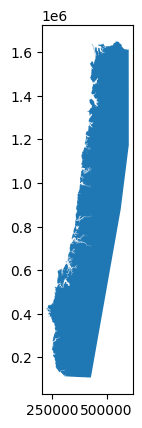

In [56]:
#checking plots
ev_zones.plot()
critical_facil.plot()
outside_hazards.plot()

<AxesSubplot: >

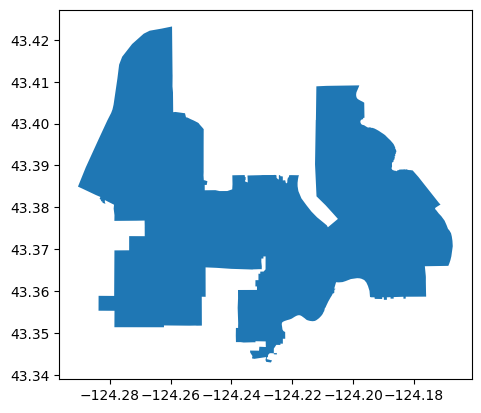

In [57]:
ox.settings.log_console=True
# define the place query for coos bay on osmnx
query = {'city': 'Coos Bay'}

# get the boundaries of the city limits
gdf_coos = ox.geocode_to_gdf(query)
gdf_coos.plot()


In [58]:
#checking coos bay data
gdf_coos.head()

,geometry,bbox_north,bbox_south,bbox_east,bbox_west,place_id,osm_type,osm_id,lat,lon,display_name,class,type,importance
0,"POLYGON ((-124.29044 43.38495, -124.28897 43.3...",43.42319,43.342956,-124.167292,-124.290437,298362632,relation,186285,43.367894,-124.217465,"Coos Bay, Coos County, Oregon, 97420, United S...",boundary,administrative,0.656381


In [59]:
#getting coos bay building data
tags = {'building': True}
cb_buildings = ox.geometries_from_place('Coos Bay, Oregon, USA', tags)

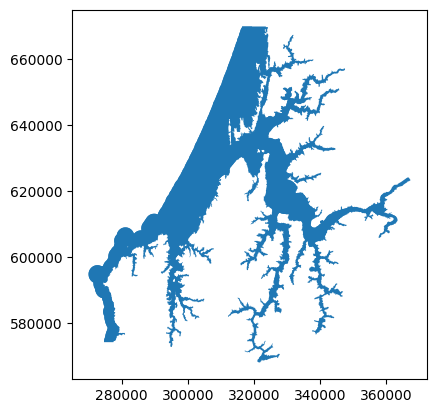

In [79]:
#masking evacuation data to just show coos bay
cb_ev_zones = ev_zones[ev_zones["Location"]=="Coos Bay Model"]
cb_ev_zones
cb_ev_zones.plot()
#reprojecting
cb_ev_zones_rp = cb_ev_zones.to_crs('EPSG:4326')

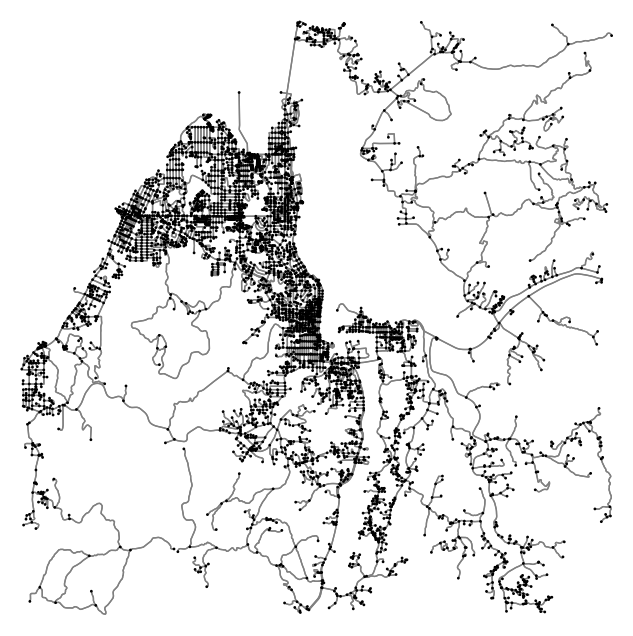

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [81]:
#creating coos bay network
lat_lon = (43.3672, -124.2131)
coos_ntwrk = ox.graph_from_point(lat_lon, dist=8000, network_type='walk')
fig, ax = ox.plot_graph(g, bgcolor='white', node_color='black', edge_color='grey', node_size=4)

node_graph = ox.graph_to_gdfs(coos_ntwrk, nodes=True, edges=False)
edge_graph = ox.graph_to_gdfs(coos_ntwrk, nodes=False, edges=True)
node_clip = node_graph.clip(gdf_coos)


<AxesSubplot: >

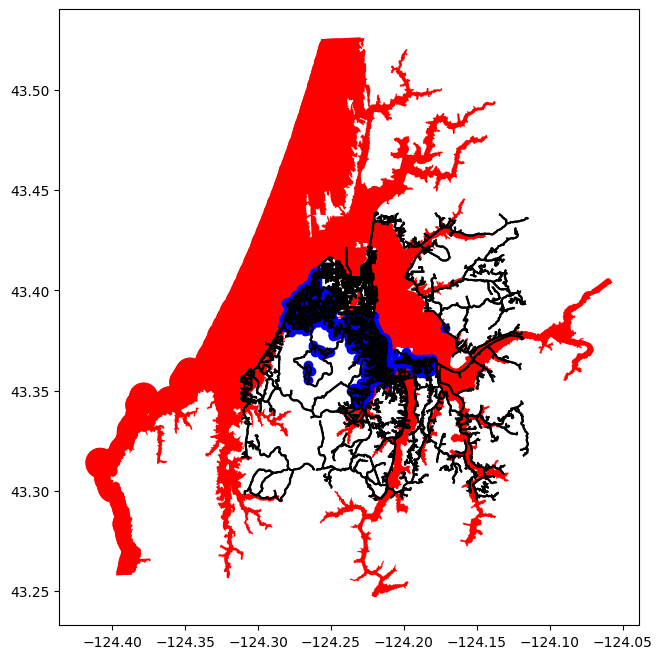

In [92]:
#graphing the network with the evacuation zones
fig, ax = plt.subplots(figsize=(12, 8))
cb_ev_zones_rp.plot(ax=ax, color= "red")
node_clip.plot(ax=ax, color= "blue")
edge_graph.plot(ax=ax, color="black")